In [42]:
# libraries
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
# reading data into data frame
df=pd.read_csv("data\Mexico-real-estate-clean.csv")
nRows, nCols=df.shape

# looking at the shape of the data
print(f"There are {nRows} rows and {nCols} columns.")

# Lookind at the datatype for each column.
print(df.info())

#looking at a sample of 10 random instances
df.sample(10, random_state=42)

There are 1730 rows and 6 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1730 non-null   object 
 1   state          1730 non-null   object 
 2   lat            1730 non-null   float64
 3   lon            1730 non-null   float64
 4   area_m2        1730 non-null   float64
 5   price_usd      1730 non-null   float64
dtypes: float64(4), object(2)
memory usage: 81.2+ KB
None


,property_type,state,lat,lon,area_m2,price_usd
599,apartment,Estado de México,19.536253,-99.240456,99.0,65789.473684
1201,house,Distrito Federal,19.343664,-99.212308,350.0,242357.820000
628,house,Tamaulipas,22.258686,-97.851753,163.0,105263.157895
1642,apartment,Yucatán,21.008295,-89.591019,142.0,91169.230000
1263,house,Veracruz de Ignacio de la Llave,25.484016,-100.966568,290.0,115910.260000
931,house,Puebla,18.462721,-97.414111,250.0,144736.842105
23,house,Veracruz de Ignacio de la Llave,25.624891,-103.397214,106.0,40041.720000
844,house,Querétaro,20.574558,-100.412968,160.0,194736.842105
964,house,Morelos,18.858107,-99.200287,105.0,72578.947368
764,house,Distrito Federal,19.523950,-99.152881,95.0,147631.578947


There are 1730 rows and 6 columns, with 2 datatypes, float and object.

In [33]:
#taking a look at the unique values per feature
for col in df.describe(include="object"):
    print(f"{col} has: {df[col].nunique()}")
    print(df[col].unique())
    print("---"*30)

property_type has: 2
['house' 'apartment']
------------------------------------------------------------------------------------------
state has: 30
['Estado de México' 'Nuevo León' 'Guerrero' 'Yucatán' 'Querétaro'
 'Morelos' 'Chiapas' 'Tabasco' 'Distrito Federal' 'Nayarit' 'Puebla'
 'Veracruz de Ignacio de la Llave' 'Sinaloa' 'Tamaulipas' 'Jalisco'
 'San Luis Potosí' 'Baja California' 'Hidalgo' 'Quintana Roo' 'Sonora'
 'Chihuahua' 'Baja California Sur' 'Zacatecas' 'Aguascalientes'
 'Guanajuato' 'Durango' 'Tlaxcala' 'Colima' 'Oaxaca' 'Campeche']
------------------------------------------------------------------------------------------


In [47]:
fig=px.scatter_mapbox(df, 
                      lat="lat",
                      lon="lon",
                      center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
                      width=600,  # Width of map
                      height=600,
                      hover_data=["price_usd"],  # Display price when hovering mouse over house
    )

fig.update_layout(mapbox_style="open-street-map")

fig.show()

The houses in the dataset seems to be evenly distributed with a considerable concentration around the Mexico City.

In [53]:
#checking for basic stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,1730.0,20.769135,2.747206,15.752900,19.273231,19.625756,21.075122,32.665619
lon,1730.0,-98.802722,4.886029,-117.054763,-100.393310,-99.204589,-98.245911,-86.767539
area_m2,1730.0,170.503468,80.589623,60.000000,102.000000,156.500000,220.000000,385.000000
price_usd,1730.0,115316.033929,65492.896545,33157.894737,65672.613421,99262.132105,150802.912500,326733.660000


<font size="+1"><strong>Insight:
    
* The minimun price for houses is 33157.894737 USD while the maximum price is 326733.660000 USD with 25 percent of the houses in this dataset cost less than 65672.613421USD, while 50 percent cost less than 99262.132105 USD and 75 percent cost less than 150802.912500.
The pricing varies with a standard deviation of 65492.896545 USD .

* Same goes for the home sizes, the minimum area of the house in this dataset is 60 meter square and the biggest house size in this dataset is 385 meter square.  25 percent of the houses have an area less than 102 meter square, while less than 50 percent has an area leass than 156.5 and 75 percent has an area less than 220 meter square..

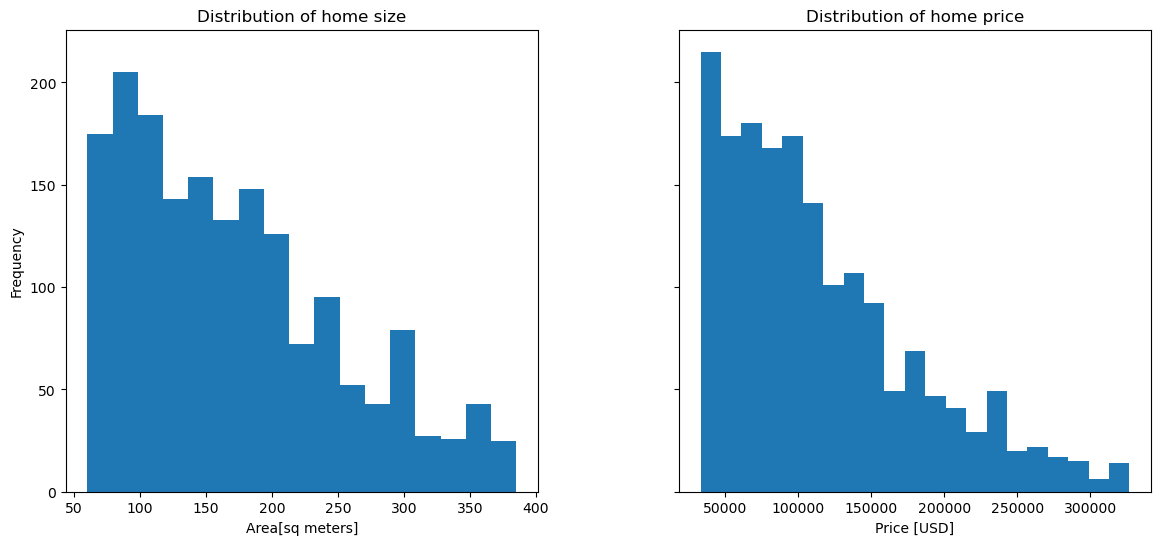

In [31]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1,2 ,sharey=True,  figsize=(14, 6))
df.drop(columns=["lon", "lat"]).hist(bins='auto', grid=False, ax=ax)

#labelling the axis
ax[0].set_xlabel("Area[sq meters]")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of home size")

ax[1].set_xlabel("Price [USD]")
ax[1].set_title("Distribution of home price");

* Mojority of the houses have an area size of less than 300 square meters. Same goes for the house prices, most of them cost less than 250 000 USD.

<font size="+1"><strong>1. Is there a relationship between house price and size?

Text(0.5, 1.0, 'Price Vs Area')

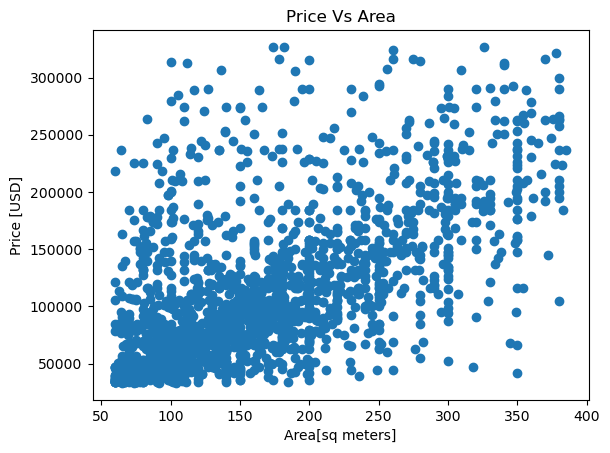

In [71]:
plt.scatter(x=df['area_m2'], y=df['price_usd'])
plt.xlabel('Area[sq meters]')
plt.ylabel('Price [USD]')
plt.title('Price Vs Area')

<Axes: >

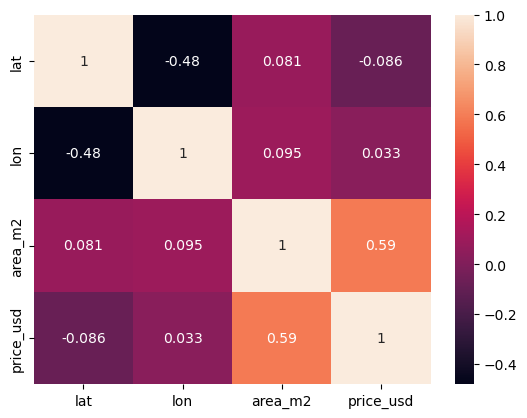

In [41]:
corr=df.select_dtypes("number").corr()
sns.heatmap(corr, annot=True)

There is a positive relationship between the house price and the size of the house, meaning as the size of the house increase so is the price.

There's also a high negative relationship between the latitude and price meaning when you move South the house prices tend to increase. Same goes for lon and the price.

**Looking at the relation between features for each state**

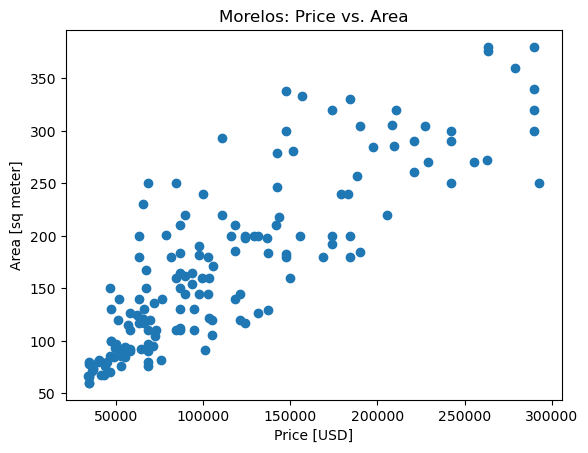

In [112]:
# subsetting to 'Morelos'
df_morelos=df[df["state"]=='Morelos']
plt.scatter(df_morelos["price_usd"], df_morelos['area_m2'])
plt.xlabel("Price [USD]")
plt.ylabel("Area [sq meter]")
plt.title("Morelos: Price vs. Area");

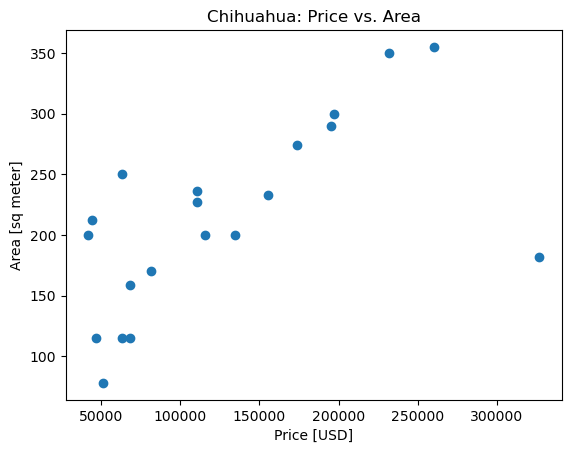

In [117]:
# subsetting to Chihuahua
df_Chihuahua=df[df["state"]=='Chihuahua']
plt.scatter(df_Chihuahua["price_usd"], df_Chihuahua['area_m2'])
plt.xlabel("Price [USD]")
plt.ylabel("Area [sq meter]")
plt.title("Chihuahua: Price vs. Area");

In [ ]:
For some states the house can be bigger and not cost much, hence, even though the size of the house does affect the price of the house but this relationship does not seem to be stronger in other states.on the area of the home but it does appear that there are other factors influencing the house price. 

<font size="+1"><strong>2.Which state has the most expensive real estate market?

In [62]:
df["price_per_m2"]=df["price_usd"]/df["area_m2"]

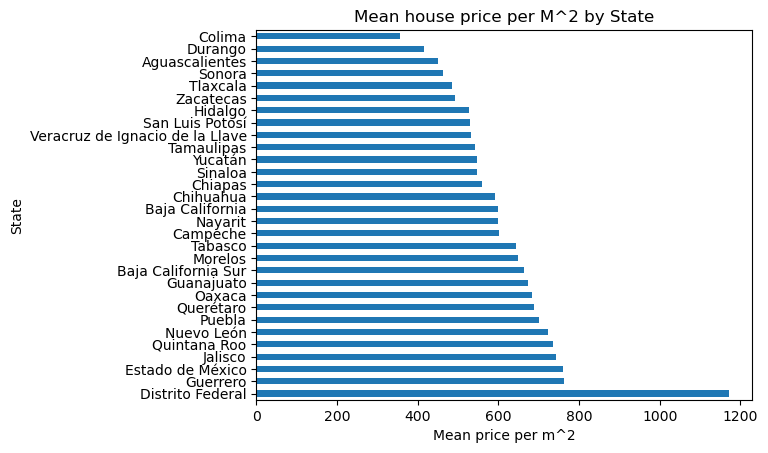

In [69]:
df.groupby("state")["price_per_m2"].mean().sort_values(ascending=False).plot(kind="barh", ylabel='State', xlabel='Mean price per m^2', title='Mean house price per M^2 by State');

<font size="+1"> Distrito Federal is the most expensive state when looking at the price per square meter and Colima is the least expensive state.